In [2]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [4]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [5]:
# Checking the data types of the columns
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [6]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)

In [7]:
# Unique values in the columns
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [8]:
# Unqiue car make
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [9]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

In [10]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [11]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


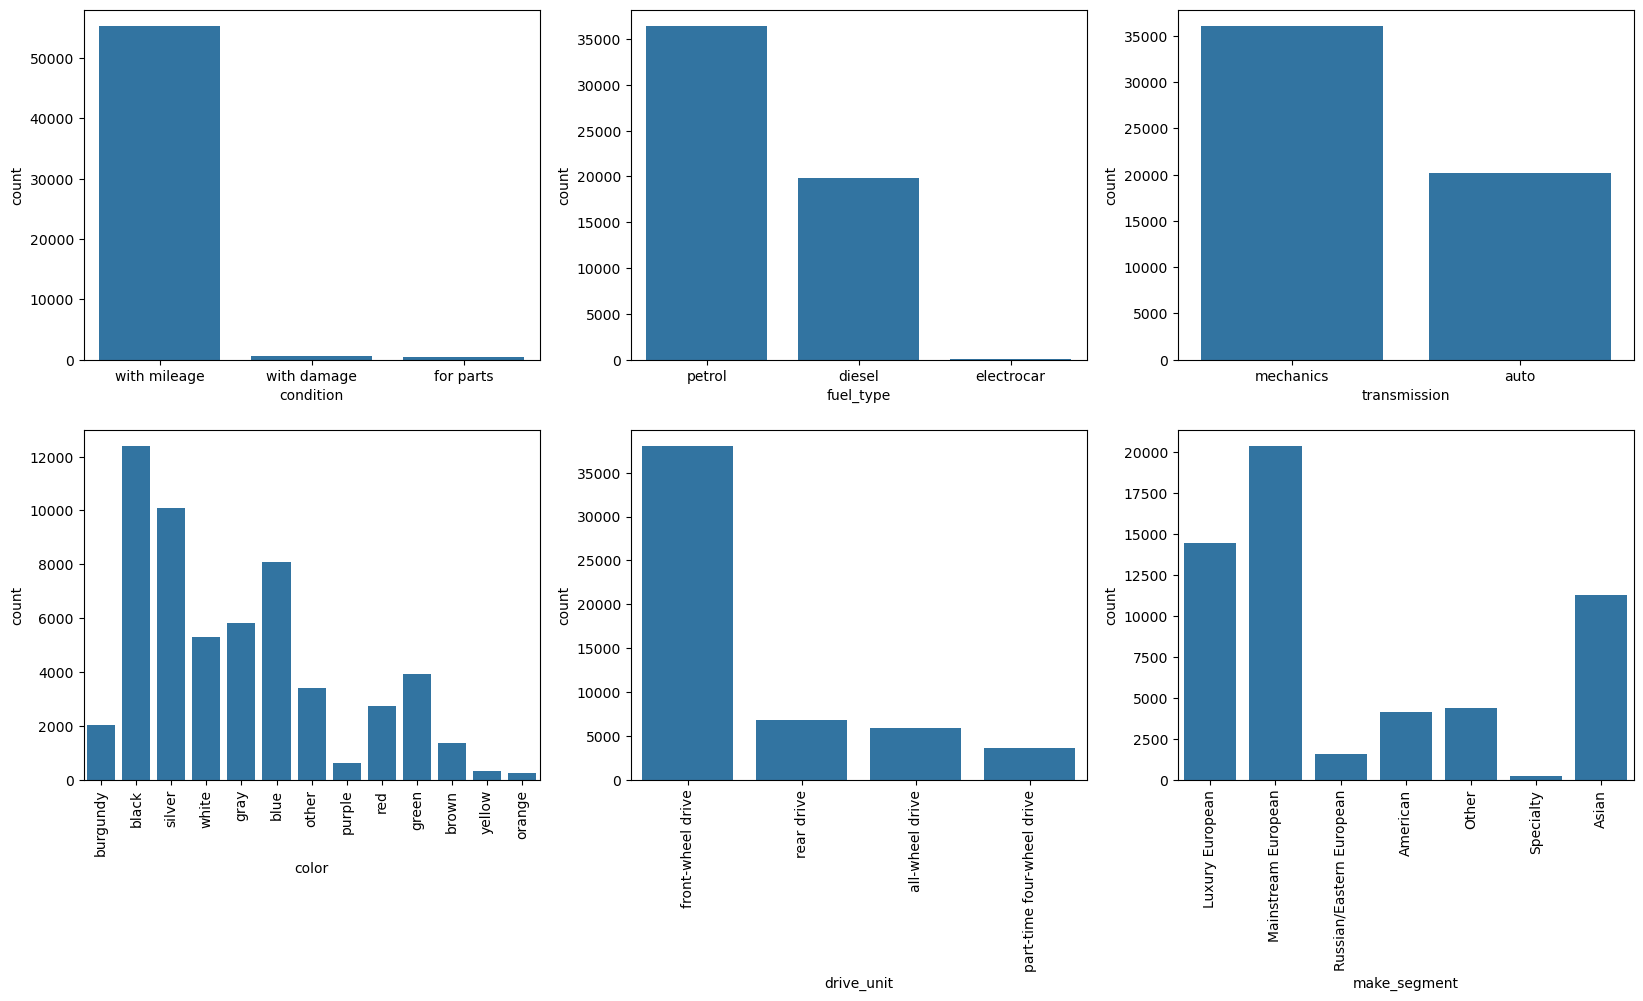

In [19]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

<Axes: xlabel='volume(cm3)', ylabel='Count'>

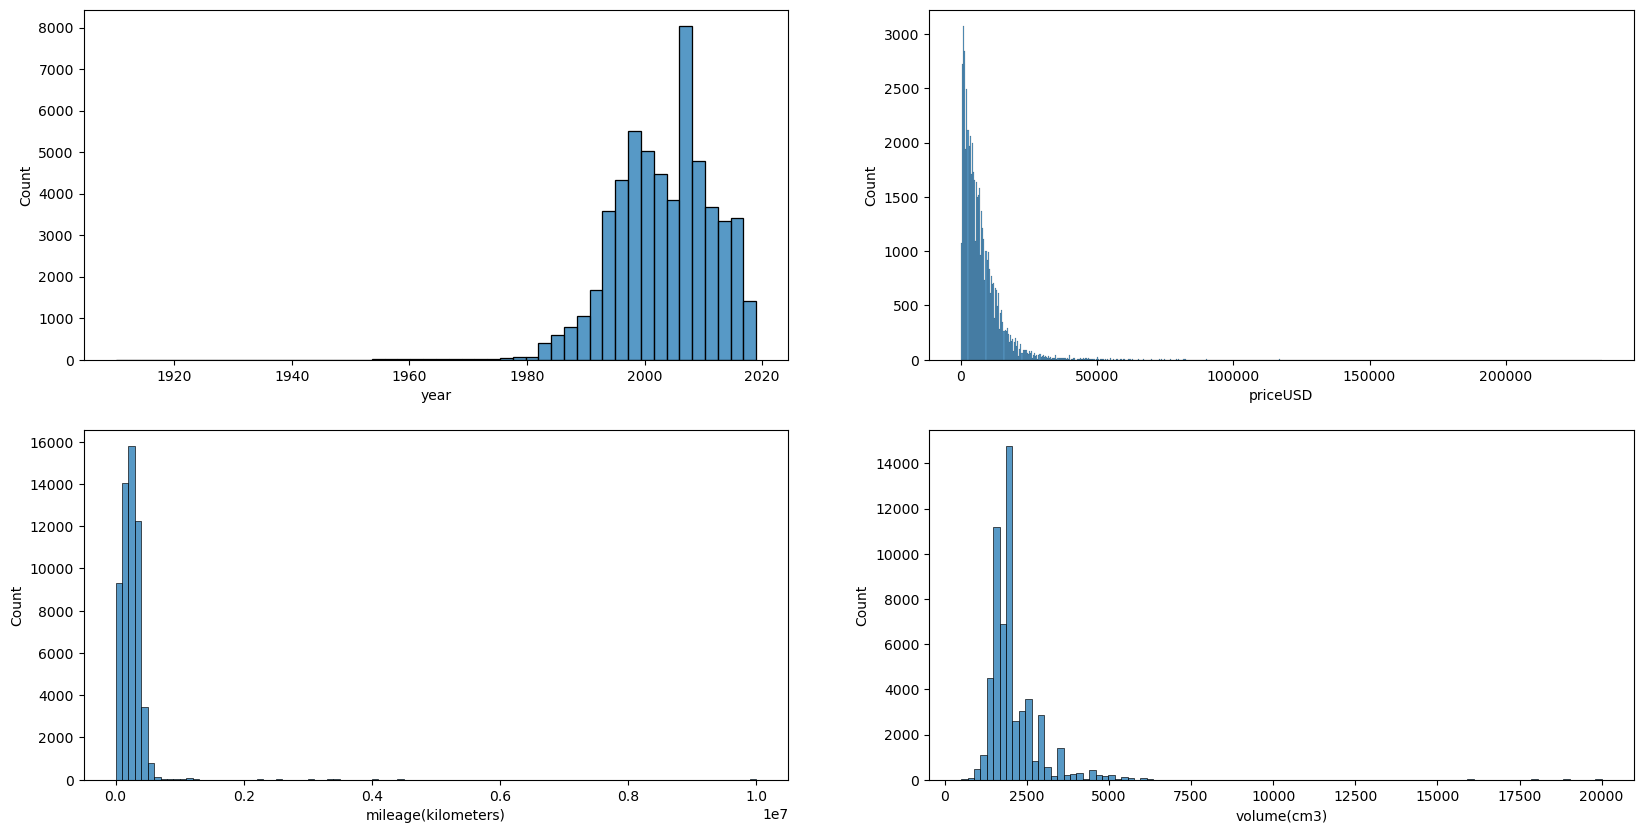

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

In [25]:
df= df[df['year']>1980]

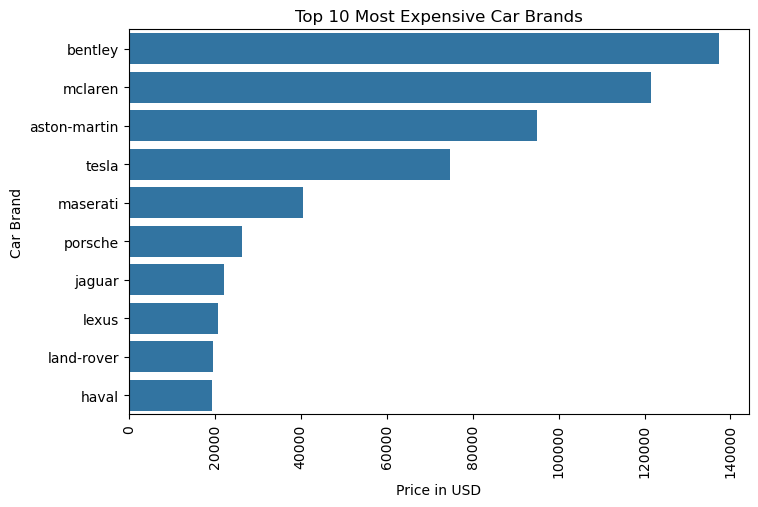

In [27]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

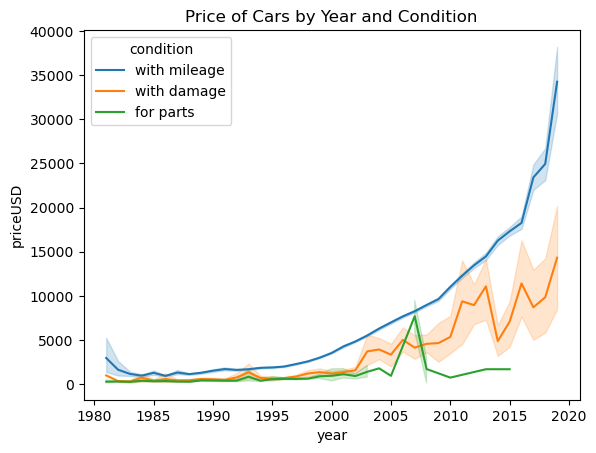

In [29]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

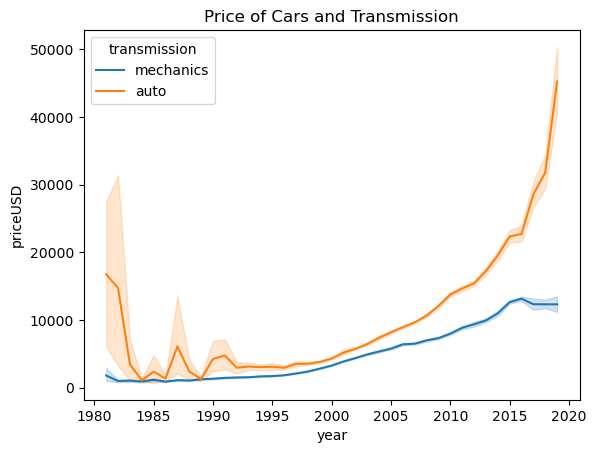

In [31]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

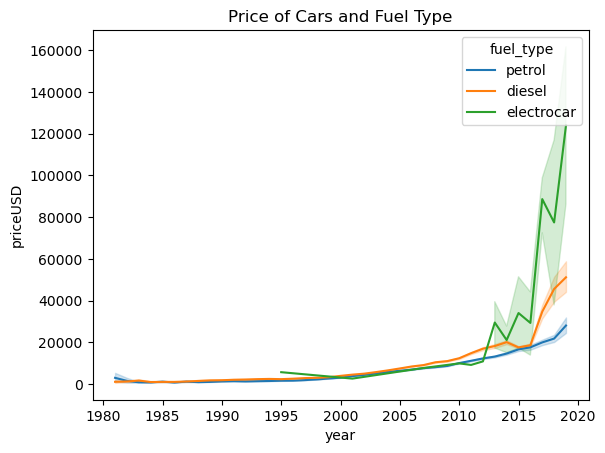

In [33]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

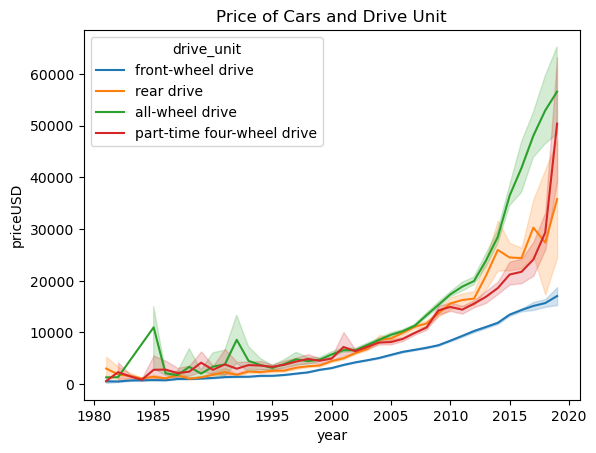

In [35]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

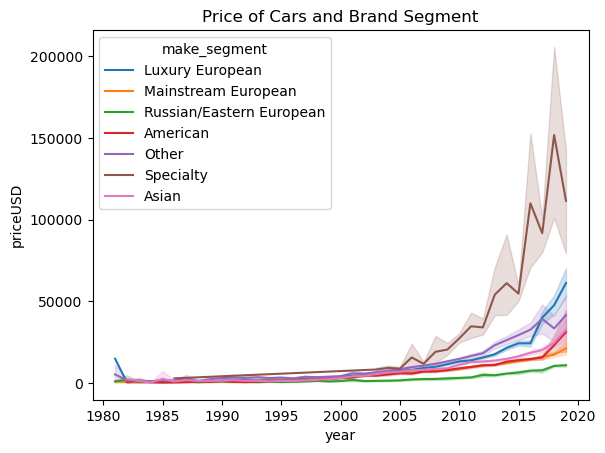

In [37]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

In [39]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [41]:
df.dropna(inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_13864\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [43]:
df.drop(columns=['make'], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_13864\1999857455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['make'], inplace=True)


In [45]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


C:\Users\dell\AppData\Local\Temp\ipykernel_13864\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_13864\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_13864\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<Axes: >

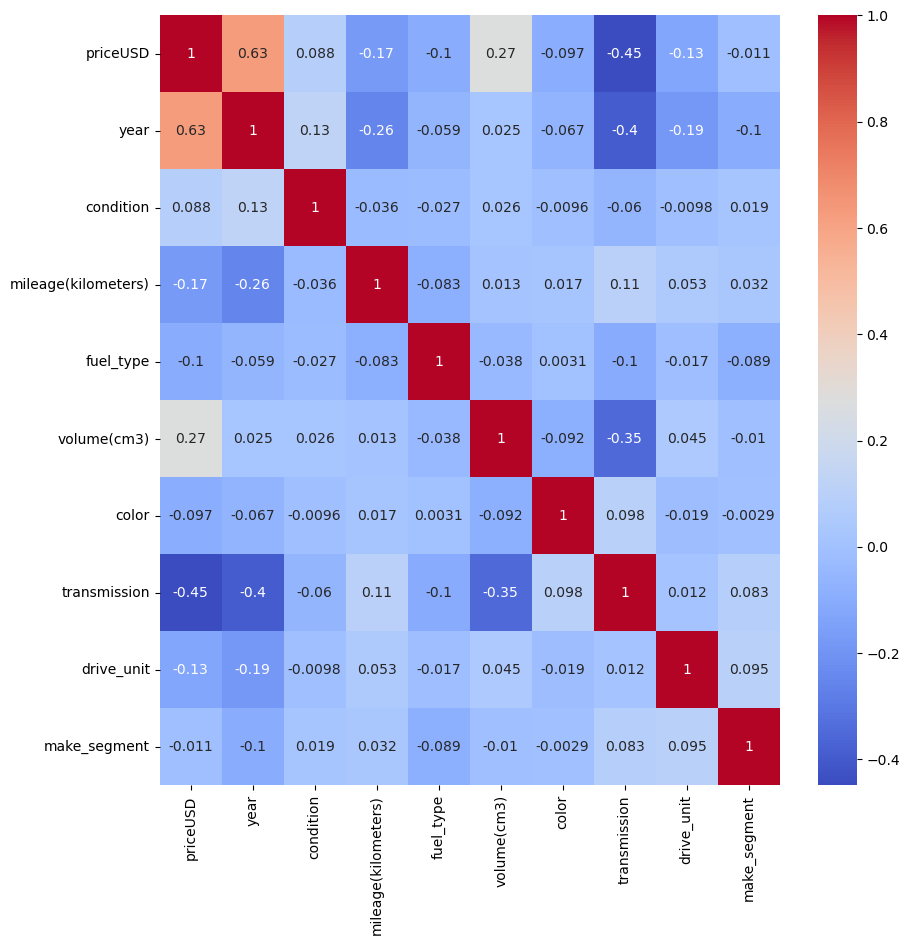

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [49]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [55]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
402 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dell\anaconda3\Lib\site-packages\s

In [61]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=0)

In [63]:
#training score
dtr.score(X_train, y_train)

0.8689232243678456

In [65]:
#predicting the test set
y_pred = dtr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8529954473045238
Mean Squared Error:  4704555.776616746
Mean Absolute Error:  1414.2804910704947
Root Mean Squared Error:  2168.9987959002524


In [69]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.754301
4,volume(cm3),0.200413
3,fuel_type,0.017333
6,transmission,0.010267
8,make_segment,0.009639
7,drive_unit,0.006883
2,mileage(kilometers),0.000872
5,color,0.000292
1,condition,0.000000


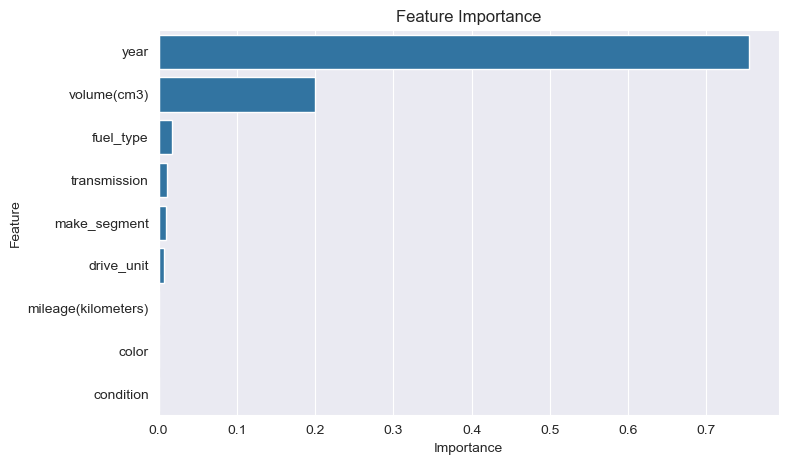

In [71]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()